# <center><font color=navy> Machine Learning from Theory to Practice</font></center>
## <center><font color=navy> Optimization Problems</font> </center>
### <center> Ali Habibnia</center>

    
<center> Assistant Professor, Department of Economics, </center>
<center> and Division of Computational Modeling & Data Analytics at Virginia Tech</center>
 <center> habibnia@vt.edu </center> 


<div class="alert alert-block alert-info">
"[N]othing at all takes place in the universe in which some rule of maximum or minimum does not appear." 

-- Leonhard Euler

<img src="images/Leonhard_Euler.jpg"  width="220">
</div>




<img style="float: right;" src="images/error.png"  width="350">

Optimization problems arise in a large variety of contexts, including **econometrics**, and **machine learning**. The underlying mathematical problem always amounts to finding parameters that **minimize** (cost/loss) or **maximize** (utility/profit) an objective function in the presence or absence of a set of constraints.

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients/parameters**. To create your model, you must "learn/estimate" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict!

Example: Visualizing the Loss Landscape of Neural Nets (NIPS 2018)

https://papers.nips.cc/paper/2018/file/a41b3bb3e6b050b6c9067c67f663b915-Paper.pdf

### What is an optimization problem?


$\newcommand{\vct}[1]{\mathbf{#1}}$
$\newcommand{\mtx}[1]{\mathbf{#1}}$
$\newcommand{\e}{\varepsilon}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\minimize}{\text{minimize}\quad}$
$\newcommand{\maximize}{\text{maximize}\quad}$
$\newcommand{\subjto}{\quad\text{subject to}\quad}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\trans}{T}$
$\newcommand{\ip}[2]{\langle {#1}, {#2} \rangle}$


A general mathematical optimization problem is a problem of the form

\begin{align*}
\begin{split}
 \minimize & f(\vct{x})\\
 \subjto & \vct{x}\in \Omega
 \end{split}
\end{align*}

where $f\colon \R^n\to \R$ is a real-valued **objective function** and $\Omega\subseteq \R^n$ is a set defining the **constraints**. Among all vectors $\vct{x}\in \Omega$, we seek one with smallest $f$-value. Typically, the constraint set $\Omega$ will consist of such $\vct{x}\in \R^n$ that satisfy certain equations and inequalities,

\begin{equation*}
f_1(\vct{x})\leq 0, \dots, f_m(\vct{x})\leq 0, g_1(\vct{x})=0, \dots, g_p(\vct{x})=0.
\end{equation*}

A vector $\vct{x}^*$ satisfying the constraints is called an **optimum**, a **solution**, or a **minimizer** of the problem, if $f(\vct{x}^*)\leq f(\vct{x})$ for all other $\vct{x}\in \Omega$. Note that replacing $f$ by $-f$, we could equivalently state the problem as a maximization problem. In this course we are mostly concerned with functions and constraint sets that are **convex**.

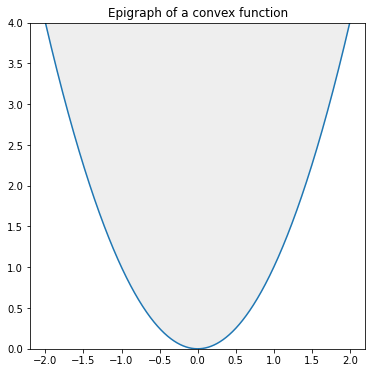

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(-2, 2, 1000)
ys = xs**2
plt.figure(1, figsize=(6, 6))
plt.title('Epigraph of a convex function')
plt.plot(xs, ys)
plt.ylim(0, 4)
plt.fill_between(xs, ys+10, ys, color='#eeeeee')

* A set $C\subseteq \R^n$ is **convex**, if for all $\vct{x},\vct{y}\in C$ and $\lambda\in [0,1]$, $\lambda \vct{x}+(1-\lambda)\vct{y}\in C$. That is, if for any two points in $C$, the line segment connecting them is also in $C$. 
* A function $f\colon C\to \R$ is convex, if $C$ is convex and for all $\vct{x}\in C$ and $\lambda\in [0,1]$, $f(\lambda \vct{x}+(1-\lambda)\vct{y})\leq \lambda f(\vct{x})+(1-\lambda)f(\vct{y})$. 

![Convex set](images/convset.png)

A **convex optimization** problem is one where the set of constraints $\Omega$ and the function $f$ are convex. While most general optimization problems are practically intractable, convex optimization problems can be solved efficiently, and still cover a surprisingly large range of applications!


### Examples of convex optimization problems
---
Countless problems from science and engineering can be cast as convex optimization problems. The examples below are merely intended to illustrate some of the problems that convex optimization deals with, and how they can be solved.

### <font color="grey">A first example: linear regression</font>
---

Suppose we want to understand the relationship of a quantity $Y$ (for example, sales data) to a series of **predictors** $X_1,\dots,X_p$ (for example, advertising budget in different media). We can often assume the relationship to be **approximately linear**,

[1]\begin{equation*}
 Y = \beta_0+\beta_1 X_1 + \cdots + \beta_p X_p + \varepsilon, 
\end{equation*}

where $\varepsilon$ is some error or noise term. The goal is to determine the **model parameters** $\beta_0,\dots,\beta_p$.
To determine these, we can collect $n\geq p$ sample realizations (from observations or experiments),

\begin{equation*}
 Y=y_i, \quad X_1=x_{i1},\dots,X_p=x_{ip}, \quad 1\leq i\leq n,
\end{equation*}

and assume that the data is related according to [1], 

\begin{equation*}
 y_i = \beta_0+\beta_1x_{i1}+\cdots +\beta_p x_{ip}+\varepsilon_i, \quad 1\leq i\leq n.
\end{equation*}

Collecting the data in matrices and vectors,

\begin{equation*}
 \vct{y} = \begin{pmatrix}
            y_1\\ \vdots \\ y_n
           \end{pmatrix},
\quad \mtx{X} = \begin{pmatrix} 
           1 & x_{11} & \cdots & x_{1p}\\
           \vdots & \vdots & \ddots & \vdots \\
           1 & x_{n1} & \cdots & x_{np}
          \end{pmatrix},
\quad \vct{\beta} = \begin{pmatrix}
                     \beta_0\\
                     \beta_1\\
                     \vdots\\
                     \beta_p
                    \end{pmatrix},
\quad \vct{\varepsilon} = \begin{pmatrix}
                  \e_1\\
                  \vdots\\
                  \e_n
                 \end{pmatrix},
\end{equation*}

we can write the relationship concisely as 

\begin{equation*}
 \vct{y} = \mtx{X}\vct{\beta}+\vct{\e}.
\end{equation*}

We would then like to find $\vct{\beta}$ in such a way that the difference $\vct{\e}=\vct{y}-\mtx{X}\vct{\beta}$ is as *small* as possible. One way of measuring the size of a vector $\vct{\e}\in \R^n$ is the square of its **$2$-norm**, or Euclidean norm, 

\begin{equation*}
 \norm{\vct{\e}}_2^2=\vct{\e}^{T}\vct{\e}=\sum_{i=1}^n\e_i^2.
\end{equation*}

The best $\vct{\beta}$ is then the vector that solves the unconstrained optimization problem

\begin{equation*}
 \minimize \norm{\mtx{X}\vct{\beta}-\vct{y}}_2^2.
\end{equation*}

This is an example of an optimization problem, with variables $\vct{\beta}$, no constraints (*all* $\beta$ are valid candidates and the constraint set is $\Omega=\R^{p+1}$), and a **quadratic** objective function 

\begin{equation*}
f(\vct{\beta})=\norm{\mtx{X}\vct{\beta}-\vct{y}}_2^2 = (\mtx{X}\vct{\beta}-\vct{y})^{T}(\mtx{X}\vct{\beta}-\vct{y}) = \vct{\beta}^{T}\mtx{X}^{T}\mtx{X}\vct{\beta}-2\vct{y}^{T}\mtx{X}\vct{\beta}+\vct{y}^{T}\vct{y},
\end{equation*}

where $\mtx{X}^{T}$ is the matrix transpose.
Quadratic functions are convex, so this is a convex optimization problem.
This simple optimization problem has a **unique closed-form solution**,

This can be re-arranged in order to specify the solution for $\vct{\beta}$ as:

\begin{equation*}
 \vct{\beta}^* = (\vct{X}^{\trans}\vct{X})^{-1}\vct{X}^{\trans}\vct{y}.
\end{equation*}

In practice one wouldn't compute $\vct{\beta}^*$ by evaluating [1], as there are more efficient methods available. 

Bear in mind that the regression has six key assumptions:

1. Linear relationship between target and features
2. Data is normally distributed or contains Multivariate normality (but doesn't have to be)
3. No or little multicollinearity
4. No auto-correlation
5. Homoscedasticity
6. Independent features

To illustrate the least squares setting using a concrete example, assume that we have data relating the basal metabolic rate (energy expenditure per time unit) in mammals to their mass.

The model we use is $Y=\beta_0+\beta_1X$, with $Y$ the basal metabolic rate and $X$ the mass. Using data for 573 mammals from the [PanTHERIA database](http://esapubs.org/archive/ecol/E090/184/\#data), we can assemble the vector $\vct{y}$ and the matrix $\mtx{X}\in \R^{n\times (p+1)}$ in order to compute the $\vct{\beta}=(\beta_0,\beta_1)^{\trans}$. Here, $p=1$ and $n=573$.

We next illustrate how to solve this problem in Python. As usual, we first have to import some relevant libraries: **numpy** for numerical computation, **pandas** for loading and transforming datasets, **cvxpy** for convex optimization, and **matplotlib** for plotting.

In [4]:
# Import some important Python modules that we will be using in this notebook
import numpy as np
import pandas as pd
# !pip install cvxpy
from cvxpy import *
import matplotlib.pyplot as plt

We next have to load the data. The data is saved in a table with 573 rows and 2 columns, where the first column list the mass and the second the basal metabolic rate.

In [6]:
# Load data into numpy array
bmr = pd.read_csv('data/bmr.csv',header=None).values
# We can find out the dimension of the data using the shape attribute
bmr.shape

(573, 2)

To see the first three and the last three rows of the dataset, we can use the "print" command.

In [7]:
print(bmr[0:3,:])

[[13.108  10.604 ]
 [ 9.3918  8.2158]
 [10.366   9.3285]]


To visualise the whole dataset, we can make a scatterplot by interpreting each row as a coordinate on the plane, and marking it with a dot.

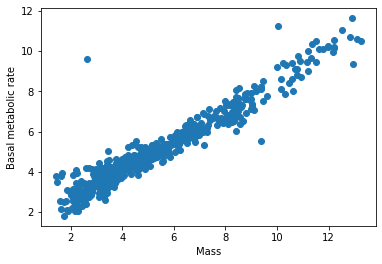

In [8]:
# Display scatterplot of data (plot all the rows as points on the plane)
%matplotlib inline
bmr1 = plt.plot(bmr[:,0],bmr[:,1],'o')
plt.xlabel("Mass")
plt.ylabel("Basal metabolic rate")
plt.show()

The plot above suggests that the relation of the basal metabolic rate to the mass is linear, i.e., of the form
\begin{equation*}
  Y = \beta_0+\beta_1 X,
\end{equation*}
where X is the mass and Y the BMR. We can find $\beta_0$ and $\beta_1$ by solving an optimization problem as described above. We first have to assemble the matrix $\mtx{X}$ and the vector $\vct{y}$.

In [9]:
n = bmr.shape[0]
p = 1
X = np.concatenate((np.ones((n,1)),bmr[:,0:p]),axis=1)
y = bmr[:,-1]

In [10]:
# Create a (p+1) vector of variables
Beta = Variable(p+1)

# Create sum-of-squares objective function
objective = Minimize(sum(square(X*Beta - y)))

# Create problem and solve it
prob = Problem(objective)
prob.solve()

print("status: ", prob.status)
print("optimal value: ", prob.value)
print("optimal variables: ", Beta[0].value, Beta[1].value)

status:  optimal
optimal value:  152.73620088899372
optimal variables:  1.3620699690664084 0.7016169195879886


Now that we solved the problem and have the values $\beta_0 = 1.362$ and $\beta_1 = 0.702$, we can plot the line and see how it fits the data.

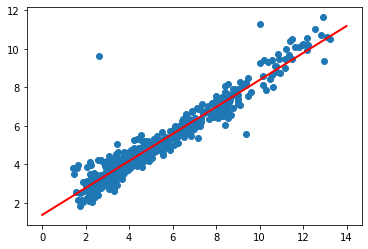

In [11]:
plt.plot(bmr[:,0],bmr[:,1],'o')

xx = np.linspace(0,14,100)
bmr = plt.plot(xx, Beta[0].value+Beta[1].value*xx, color='red', linewidth=2)
plt.show()

Even though for illustration purposes we used the CVXPY package, this particular problem can be solved directly using the least squares solver in numpy.

In [12]:
import numpy.linalg as la
beta = la.lstsq(X,y,rcond=-1)
print(beta[0])

[1.36206997 0.70161692]


*** See more examples:  https://www.cvxpy.org/examples/index.html ***

### <font color="grey">Machine Learning</font>
---

The above example is an example of a **machine learning** problem. In machine learning, one seeks to **learn** a function $F$ mapping some inputs $X$ to outputs $Y$, $Y=F(X)$. A few examples:
* X: economic data, Y: value of a stock;
* X: physiological data, Y: medical diagnosis;
* X: email, Y: 1 if email is spam, 0 otherwise;
* X: scanned image, Y: a letter represented by that image.

In **supervised learning** we have a set of sample input pairs, $(y_i,x_i)$, $1\leq i\leq m$, and we typically try to find a function $F$ that minimizes the **least squared error**,

\begin{equation*}
  \minimize \sum_{i=1}^m (\vct{y}_i-F(\vct{x}_i))^2,
\end{equation*}

where one minimizes over all functions $F$ from some class. In the above example, we assumed our functions to be linear, in which case the can by parametrized by the coefficients $\beta_0, \dots,\beta_p$. As the course progresses, we will see examples of more sophisticated machine learning problems, often with nonlinear objective function and other **loss functions** instead of the least square error. 

### <font color="grey">A second example: linear programming</font>
---
Suppose a plane has two cargo compartments with weight capacities $C_1=35$ and $C_2=40$ tonnes, and volumes (space capacities) $V_1=250$ and $V_2=400$ cubic metres. Assume we have three types of cargo to transport, specified as follows.

 
 | Cargo    | Volume (m$^3$ per tonne) | Weight (tonnes) | Profit (£ / tonne)|
 |---|---|---|---| 
 | Cargo 1  |   8                      |  25             | £ 300           |
 | Cargo 2  |  10                      |  32             | £ 350           |
 | Cargo 3  |   7                      |  28             | £ 270           |
  
 The problem is now to decide how much of each cargo to take on board, and how to distribute it in an optimal way among the two compartments.
 1. The **decision variables** $x_{ij}$ specify the amount, in tonnes, of cargo $i$ to go into compartment $j$. We collect them in a vector $\vct{x}$.
 2. The **objective function** is the total profit, 
 
  \begin{equation*}
   f(\vct{x}) = 300\cdot (x_{11}+x_{12})+ 350\cdot (x_{21}+x_{22})+270\cdot (x_{31}+x_{32}).
  \end{equation*}
 
 
 3. The **constraints** are given by the space and weight limitations of the compartments, and the amount of cargo available.

\begin{align*}
 x_{11}+x_{12} & \leq 25 \quad \text{ (total amount of cargo 1)}\\ 
 x_{21}+x_{22} & \leq 32 \quad \text{ (total amount of cargo 2)}\\ 
 x_{31}+x_{32} & \leq 28 \quad \text{ (total amount of cargo 3)}\\
 x_{11}+x_{21}+x_{31} & \leq 35 \quad \text{ (weight constraint on compartment 1)}\\
 x_{12}+x_{22}+x_{32} & \leq 40 \quad \text{ (weight constraint on compartment 2)}\\
 8x_{11}+10x_{21}+7x_{31} & \leq 250 \quad \text{ (volume constraint on compartment 1)}\\
 8x_{12}+10x_{22}+7x_{32} & \leq 400 \quad \text{ (volume constraint on compartment 2)}\\
 (x_{11}+x_{21}+x_{31})/35 - (x_{12}+x_{22}+x_{32})/40 &= 0 \quad \text{ (maintain balance of weight ratio)}\\
 x_{ij} &\geq 0 \quad \text{ (cargo can't have negative weight)}
\end{align*}

 It is customary to write the objective function as a scalar product, $f(\vct{x}) = \ip{\vct{c}}{\vct{x}} := \vct{c}^{\trans}\vct{x}$, and to express the constraints as systems of linear equations and inequalities using matrix-vector products,

\begin{align*}
  \maximize &\ip{\vct{c}}{\vct{x}} \\
  \subjto &A\vct{x}\leq \vct{b}\\
  & B\vct{x} = \vct{d}\\
          & \vct{x}\geq 0        
 \end{align*}

where the inequalities $\geq$ and $\leq$ are to be understood componentwise.
 This problem has a unique solution that can be found using CVXPY in Python.
 

In [13]:
# Define all the matrices and vectors involved
c = np.array([300,300,350,350,270,270])
A = np.array([[1, 1, 0, 0, 0, 0],
              [0, 0, 1, 1, 0, 0],
              [0, 0, 0, 0, 1, 1],
              [1, 0, 1, 0, 1, 0],
              [0, 1, 0, 1, 0, 1],
              [8, 0, 10, 0, 7, 0],
              [0, 8, 0, 10, 0, 7]])
b = np.array([25,32,28,35,40,250,400]);
B = np.array([1/35, -1/40, 1/35, -1/40, 1/35, -1/40]);
d = np.zeros(1)

# Create variables, objective and constraints
x = Variable(6)
constraints = [A*x <= b, B*x == d, x >= 0]
objective = Maximize(c*x)

# Create a problem using the objective and constraints and solve it
prob = Problem(objective, constraints)
prob.solve()

print("Solution found: \n", np.round(np.abs(x.value), decimals=2).transpose())

Solution found: 
 [ 6.75  7.71  0.   32.   28.    0.  ]


In summary, the solution found is
 \begin{equation*}
 x_{11} = 6.75 , x_{12} =  7.71, x_{21} = 0, x_{22} = 32, x_{31} = 28, x_{32} = 0.
 \end{equation*}

 We made some simplifying assumptions, for example that the cargo can be split up into arbitrary fractions. Additional work is required to resolve these issues.
 Problems of this kind are known as [**linear programming**](https://en.wikipedia.org/wiki/Linear_programming), because the objective function and the constraints are given by linear functions. Such problems can be solved efficiently using the simplex algorithm or interior point methods. The highly developed theory of linear programming acts as a template for more general convex optimization that is developed in this course.

## Convex Optimization

In this section, we are concerned with a method of optimization, namely **Gradient Descent**, which will be quite usefull later on in serveral topics. Gradient descent is by far the most popular optimization strategy, used in machine learning and deep learning at the moment.

Gradient Descent is used while training a machine learning model. It is an optimization algorithm, based on a convex function, that tweaks its parameters iteratively to minimize a given function to its local minimum.

So let's say we have a function that given our model and its parameters, can tell us how closely it can predict outcome. This **cost/loss function** is to measure how good the model fits the data. So if we change the value of parameters in a way that minimizes the error of the loss function, we are "training" the model on the data. Gradient Descent helps us in finding proper parameter values, in a systematic way, leading to minimum error.

If you recall from Calculus, a major application of derivatives was to determine the extrema of the function. There are two kinds of extrema: *global* and *local*, sometimes referred to as "absolute" and "relative", respectively. A global maximum is a point that takes the largest value on the entire range of the function, while a global minimum is the point that takes the smallest value on the range of the function. On the other hand, local extrema are the largest or smallest values of the function in the immediate vicinity. 

In many cases, extrema look like the crest of a hill or the bottom of a bowl on a graph of the function. A global extremum is always a local extremum too, because it is the largest or smallest value on the entire range of the function, and therefore also its vicinity. 

At any extremum, the slope of the graph is necessarily $0$ (or is undefined, as in the case of $-| x |$), as the graph must stop rising or falling at an extremum, and begin to head in the opposite direction. Because of this, extrema are also commonly called stationary points or turning points. Therefore, the first derivative of a function is equal to $0$ at extrema. If the graph has one or more of these stationary points, these may be found by setting the first derivative equal to $0$ and finding the roots of the resulting equation. 

Let's look at the curve of the function $f(x) = x^2-4x+4$ and its derivative:

In [14]:
!pip install -q torch sympy

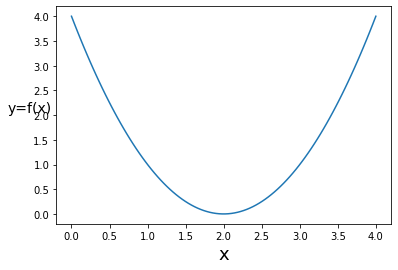

Text(0, 0.5, 'df(x)/dx')

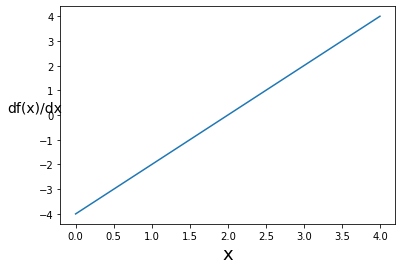

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#this is where we define the function f. this functio returns back f(x)
def f(z):
  return (z**2-4*z+4)


#this function returns back the derivative of the defined the function f at different values x, i.e. it returns back df/d(x) evaluated at x.

def df(z):
  return(2*z-4)

x=np.linspace(0,4,100)
y=f(x)
slope=df(x)
plt.plot(x,y)
plt.xlabel("x", fontsize=18)
plt.ylabel("y=f(x)", rotation=0, fontsize=14)
plt.show()
plt.plot(x,slope)
plt.xlabel("x", fontsize=18)
plt.ylabel("df(x)/dx", rotation=0, fontsize=14)



However, remember that a slope of zero does not guarantee a maximum or minimum: there is a third class of stationary point called **saddle point**. Consider the function $f(x)=x^{3}$ with derivative $f'(x)=3x^{2}$ The slope at $x=0$ is $0$. We have a slope of $0$, but while this makes it a stationary point, this doesn't mean that it is a maximum or minimum.

> **In plot above, say we start with a trivial starting point $x_0$. Investigate how iteratively moving in opposite direction of the slope (i.e. gradient) will lead you to the minimum. Voilà, this is Gradient Descent!**


# Differentiation with Computers

In example above we manually found the derivative of the function of interest. While you may opt this approach for your toy examples where you want to implement the model from scratch, this is rarely a good idea. Other than manually working out the derivatives, which is not only time-consuming and error-prone, but sometimes impossible for large-scale problems of many independent and dependent variables, there are three main methods: **Numerical**, **Symbolic** and **Automatic Differentiation**.

## Numerical Differentiation

**Numerical Differentiation** relies on limit definition of a derivative. The simplest method is to use finite difference approximations, that is to calculate the slope of a nearby secant line through the points $(x,f(x))$ and $(x+h,f(x+h))$. For a multivariate function $f:\mathbb{R}^n \rightarrow \mathbb{R}$, the gradient $\nabla f$ is approximated by

$\frac{\partial f(x)}{\partial x_i} \approx \frac{f(x+he_i)-f(x)}{h}$

The slope of the secant line deviates by an amount approximately proportional to $h$. Choosing small values $h$ however does not necessarily yield better approximation, as round-off error inflicted by subtraction in floating-point arithmetic causes the finite difference formulae to be inherently ill-conditioned and unstable (even for the more stable center difference approximation approach). Moreover, the $O(n)$ time complexity would make this approach inappropriate for ML use cases where derivative for millions of parameters are to be calculated.

## Symbolic Differentiation

**Symbolic Differentiation** works by symbolic manipulation of closed-form expressions using rules of differential calculus. Symbolic differentiation of an expression tree can be a mechanical process performed by computer that given a formula produces the derivative expressions with respect to independent variables. While it is able to give valuable insight into the structure of the problem and is useful in its own right, this method suffers from the problem of *expression swell*. The final exact form of a derivative of an expression can get exponentially large that it would render the result of symbolic differentiation very difficult to use. This method is used by mathematical analysis systems such as *Mathematica*.

We can use the python library `SymPy` to see how this works. Let's say we are given the function $y = f(x_1, x_2) = x_1x_2-cos(x_1)$. Let find 

In [16]:
import sympy as sp
y, x1, x2 = sp.symbols('y x1 x2')

In [17]:
expr = x1 * x2 - sp.cos(x1)
print(expr)

x1*x2 - cos(x1)


In [18]:
dydx1 = sp.diff(expr, x1)
dydx2 = sp.diff(expr, x2)
print('dy/dx1=', dydx1)
print('dy/dx2=', dydx2)

dy/dx1= x2 + sin(x1)
dy/dx2= x1


## Automatic Differentiation

**Automatic Differentiation** refers to a family of procedures to automatically calculate exact derivatives of any function, including program subroutines, with time complexity at most a small constant factor of the original function. It differs from *finite differences* approach where large numerical errors and time-complexity make it unreliable and impractical. It also does not suffer from the *expression swell* problem of *symbolic differentiation* that would result in inefficiently long derivatives that correspondingly take long to evaluate. Existing libraries implement AD either by tracing a program's execution at runtime (like *PyTorch*) or building a data-flow graph and then differentiating it ahead-of-time (like *TensorFlow*).

AD augments the standard computation with calculation of derivatives whose combination through chain rule gives the derivative for overall composition. AD can be applied on evaluation trace of arbitrary program subroutines which can be more than closed-form functions and are in fact capable of incorporating complex control flows which do not directly alter values. An automatic differentiator takes a code subroutine that computes a function of several independent variables as input and gives as output a code that computes the original function along the gradient of the function with respect to the independent variables. As most of the functions are piece-wise differentiable and control flows not directly interfering with calculations, chain rule can be used repeatedly in such a way that gradients are calculated along intermediate values being computed. 

Based on modus operandi of automatic differentiation there can be two implementations of this technique; the **forward mode** and the **reverse mode**. We investigate each method, by applying them on the same trivial function $y = f(x_1, x_2) = x_1x_2-cos(x_1)$ at $(x_1, x_2) = (6, 3)$.

$\begin{aligned}
v_1 &= x_1 &= 6\\
v_2 &= x_2 &= 3\\
v_3 &= v_1v_2 &= 6\times3\\
v_4 &= cos(v_1) &= cos(6)\\
v_5 &= v_3-v_4 &= 18-0.96\\
y &= v_5 &= 17.04
\end{aligned}$

### Forward Mode

We build a *Forward Primal Trace* of the values propagating through the function and a corresponding *Forward Tangent Trace*.
Equation above shows the forward evaluation of primals. Forward primal trace depicts the natural flow of composition. Equation below is the corresponding tangent trace for $\dot{y} = \frac{\partial f}{\partial x_1}$, that is the rate of change of the function $f$ with respect to the input $x_1$. Notice that both traces are evaluated as written, top to bottom. To calculate the derivative with respect to $n$ different parameters, $n$ forward mode differentiations would be needed. This makes the forward-mode very inefficient for deep learning models where the number of parameters may amount to millions.

$
\begin{aligned}
\dot{v_1} &= \dot{x_1} &= 1\\
\dot{v_2} &= \dot{x_2} &= 0\\
\dot{v_3} &= \dot{v_1}v_2+\dot{v_2}v_1 &= 1 \times 3+0 \times 6\\
\dot{v_4} &= \dot{v_1}\times -sin(v_1) &= 1 \times -sin(6)\\
\dot{v_5} &= \dot{v_3}-\dot{v_4} &= 3 - 0.279\\
\dot{y} &= \dot{v_5} &= 2.72
\end{aligned}
$

### Backward Model

This method works by complementing each intermediate variable $v_i$ with an adjoint $\bar{v_i}$ representing the sensitivity of output $y$ to changes in $v_i$. In reverse mode the code is executed and the trace is stored in memory at first stage. At second stage, the adjoints are calculated in opposite direction of the execution of the original function. The reverse adjoint trace corresponding to the forward evaluation above is depicted below:

$
\begin{aligned}
\bar{v_5} &= \bar{y} &= 1 \\
\bar{v_4} &= \bar{v_5}\frac{\partial v_5}{\partial v_4} &= \bar{v_5}\times -1 &= -1 \\
\bar{v_3} &= \bar{v_5}\frac{\partial v_5}{\partial v_3} &= \bar{v_5}\times 1 &= 1 \\
\bar{v_1} &= \bar{v_4}\frac{\partial v_4}{\partial v_1} &= \bar{v_4}\times -sin(v_2) &= -0.27 \\
\bar{v_2} &= \bar{v_3}\frac{\partial v_3}{\partial v_2} &= \bar{v_3}\times v_1  &=  6\\
\bar{v_1} &= \bar{v_1} + \bar{v_3}\frac{\partial v_3}{\partial v_1} &= \bar{v_1} + \bar{v_3} \times v_2 &= 2.72 \\
\bar{x_1} &= \bar{v_1} & &= 2.72\\
\bar{x_2} &= \bar{v_2} & &= 6\\
\end{aligned}
$

# Gradient Descent in Action

In this section we employ PyTorch to do Automatic Differentiation required in Gradient Descent in order to find the minima of a trivial function. 

Bear in mind that the function of interest may be a **loss function** showing the amount of "error" we get with specific model configuration (i.e. parameter values such as coefficients, intercept, ...). Finding the parameter values resulting in minimum error is our main interest here. 

# 2-D Function Optimization

In [19]:
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
from IPython.display import HTML

# Optimization of function 
$ f(x) = x^{2} $

In [20]:
def func2d(x):
    #return math.log(1 + math.fabs(x)**(2+math.sin(x)))
    return x**2

In [21]:
xmin,xmax,xstep = -10.5,10.5,0.2
x_points = np.arange(xmin,xmax,xstep)
f_x_2d = []
for i in range(0,len(x_points)):
    f_x_2d.append(func2d(x_points[i]))

# Pick a starting Point & Define minima of the function

In [22]:
#x0 = random.randint(int(xmin),int(xmax))
x0 = -8
minima_x = 0
print('X0 : %d'%(x0))
print('Minima : %.2f'%(func2d(minima_x)))

X0 : -8
Minima : 0.00


# Plot Function Surface

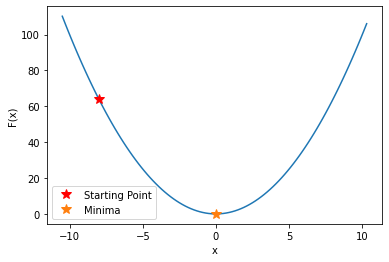

In [23]:
plt.plot(x_points,f_x_2d)
plt.xlabel('x')
plt.plot(x0,func2d(x0),'r*',markersize=10,label='Starting Point')
plt.plot(minima_x,func2d(minima_x),'*',markersize=10,label='Minima')
plt.legend()
plt.ylabel('F(x)')
plt.show()

# Build Computation Graph for Automatic Differentiation using PyTorch

In [24]:
import torch
from IPython import display
import time

epochs = 200
learning_rate = 0.01
path_x, path_fx = [], []

# make sure you set initial point correctly
x = torch.tensor(x0,dtype=torch.float32,requires_grad=True)

for epoch in range(0,epochs):
    
    # loss
    y = x**2
    
    # calculate gradients
    y.backward()
    
    # Gradient Descent
    with torch.no_grad():
    
        x.data -= (learning_rate * x.grad.data)
        x_numpy = x.detach().numpy()
        path_x.append(np.copy(x_numpy))
        path_fx.append(func2d(np.copy(x_numpy)))
    
    x.grad.data.zero_()

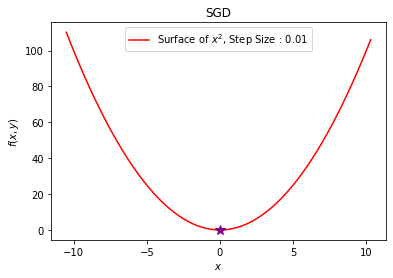

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def animate(i):
    ax.clear()
    ax.plot(x_points,f_x_2d,label='Surface of $x^{2}$, Step Size : '+(str(learning_rate)),color='red')
    ax.plot(minima_x,func2d(minima_x),'r*',markersize=10,color='purple')
    ax.plot(path_x[0:i],path_fx[0:i],color='black',linewidth=4)
    ax.legend()
    ax.set_xlabel('$x$')
    ax.set_ylabel('$f(x,y)$')
    ax.set_title('SGD')

ani = animation.FuncAnimation(fig,animate,frames=len(path_x),interval=60,repeat=False)

In [8]:
from IPython.display import HTML
HTML(ani.to_html5_video())

NameError: name 'ani' is not defined

# Optimization of function
$ f(x) = log( 1 + |x| ) ^ {2 + sin(x)} $

In [27]:
def func2d(x):
    return math.log(1 + math.fabs(x)**(2+math.sin(x)))

In [28]:
xmin,xmax,xstep = -10.5,10.5,0.2
x_points = np.arange(xmin,xmax,xstep)
f_x_2d = []
for i in range(0,len(x_points)):
    f_x_2d.append(func2d(x_points[i]))

# Pick a starting Point & Define minima of the function

In [29]:
x0 = random.randint(int(xmin),int(xmax))
x0 = 7
minima_x = 0
print('X0 : %d'%(x0))
print('Minima : %.2f'%(func2d(minima_x)))

X0 : 7
Minima : 0.00


# Ploting surface of the function

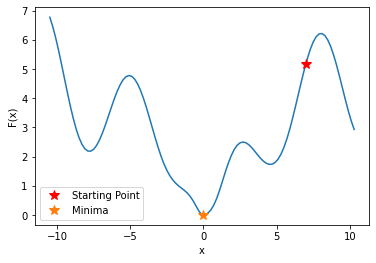

In [30]:
plt.plot(x_points,f_x_2d)
plt.xlabel('x')
plt.plot(x0,func2d(x0),'r*',markersize=10,label='Starting Point')
plt.plot(minima_x,func2d(minima_x),'*',markersize=10,label='Minima')
plt.legend()
plt.ylabel('F(x)')
plt.show()

In [31]:
import torch
from IPython import display
import time

epochs = 300
learning_rate = 0.01
path_x, path_fx = [], []

# make sure you set initial point correctly
x = torch.tensor(x0,dtype=torch.float32,requires_grad=True)

for epoch in range(0,epochs):
    
    # loss
    y = torch.log(1 + (torch.abs(x)**(2 + torch.sin(x))))
    
    # calculate gradients
    y.backward()
    
    # Gradient Descent
    with torch.no_grad():
    
        x.data  -= (learning_rate * x.grad.data)
        x_numpy = x.detach().numpy()
        path_x.append(np.copy(x_numpy))
        path_fx.append(func2d(np.copy(x_numpy)))
        
    # Make gradients zero
    x.grad.data.zero_()

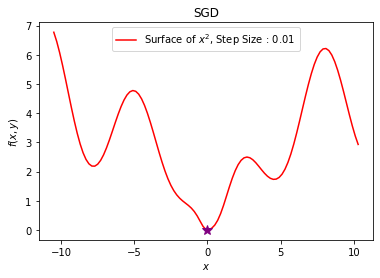

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def animate(i):
    ax.clear()
    ax.plot(x_points, f_x_2d, label='Surface of $x^{2}$, Step Size : '+(str(learning_rate)), color='red')
    ax.plot(minima_x, func2d(minima_x),'r*',markersize=10, color='purple')
    ax.plot(path_x[0:i], path_fx[0:i], color='black', linewidth=4)
    ax.legend()
    ax.set_xlabel('$x$')
    ax.set_ylabel('$f(x,y)$')
    ax.set_title('SGD')

ani = animation.FuncAnimation(fig, animate, frames=len(path_x), interval=60, repeat=False)

In [33]:
import matplotlib.pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'
HTML(ani.to_html5_video())

# 3D function optimization

In [34]:
f  = lambda x, y: (x**2) - (y**2)

In [35]:
xmin,xmax,xstep = -4.5,4.5,0.2
ymin,ymax,ystep = -4.5,4.5,0.2

In [36]:
x,y = np.meshgrid(np.arange(xmin,xmax,xstep),np.arange(ymin,ymax,ystep))
z = f(x,y)

In [37]:
from mpl_toolkits.mplot3d import Axes3D

# Pick a starting Point

In [38]:
x0 = -3
y0 = -0.1
print('X0 : %.2f, Y0 : %.2f '%(x0,y0))

X0 : -3.00, Y0 : -0.10 


# Plot function surface

Text(0.5, 0, '$f(x,y)$')

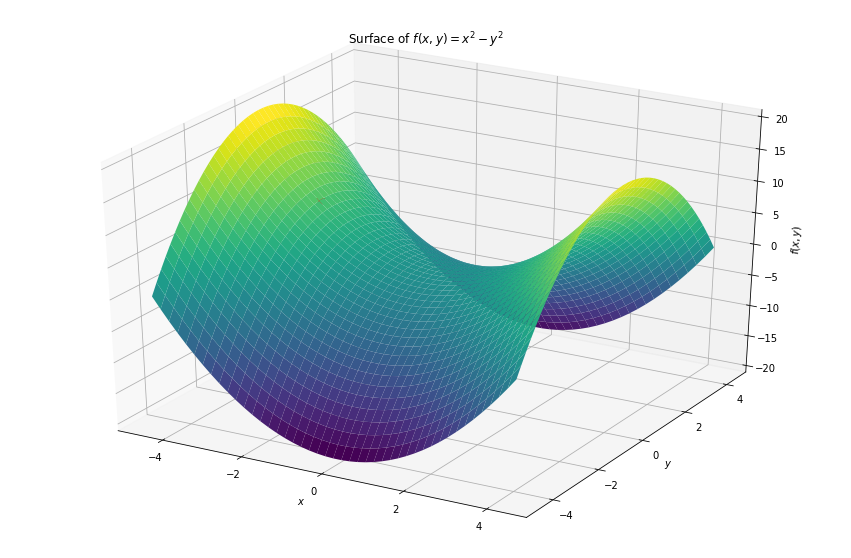

In [39]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_surface(x,y,z,cmap='viridis')
ax.plot([x0],[y0],[f(x0,y0)],'r*',markersize=10)
ax.set_title('Surface of $f(x,y) = x^{2} - y^{2}$')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x,y)$')

In [40]:
import torch
from IPython import display
import time

epochs = 180
learning_rate = 0.01

path_x, path_y, path_fxy = [], [], []


# make sure you set initial point correctly
x_torch = torch.tensor(x0,dtype=torch.float32,requires_grad=True)
y_torch = torch.tensor(y0,dtype=torch.float32,requires_grad=True)

for epoch in range(0,epochs):
    
    # objective function
    z_torch = (x_torch**2) - (y_torch**2)
    
    
    # backward
    z_torch.backward()
    
    # Gradient Descent
    with torch.no_grad():
        
        x_torch.data -= (learning_rate * x_torch.grad.data)
        y_torch.data -= (learning_rate * y_torch.grad.data)
        x_numpy = x_torch.detach().numpy()
        y_numpy = y_torch.detach().numpy()
        
        path_x.append(np.copy(x_numpy))
        path_y.append(np.copy(y_numpy))
        path_fxy.append(np.copy(f(x_numpy,y_numpy)))
        
    # make gradients zero
    x_torch.grad.data.zero_()
    y_torch.grad.data.zero_()
    

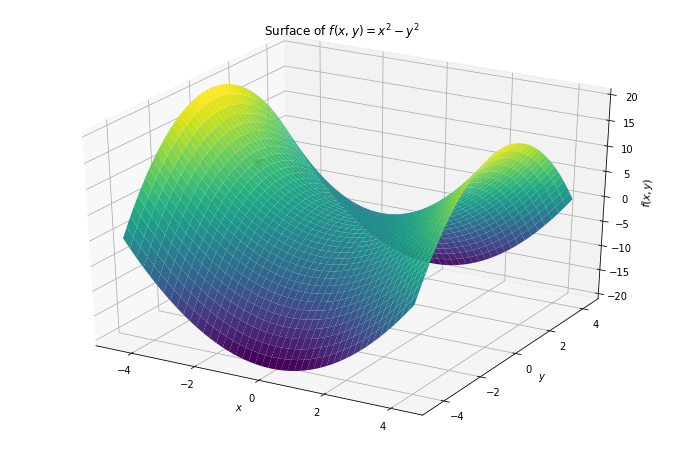

In [41]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.set_title('SGD with momentum')
def animate(i):
    
    ax.clear()
    ax.plot_surface(x,y,z,cmap='viridis')
    ax.plot([x0],[y0],[f(x0,y0)],'r*',markersize=10)
    ax.plot(path_x[0:i],path_y[0:i],path_fxy[0:i],linewidth=2,color='black')
    ax.set_title('Surface of $f(x,y) = x^{2} - y^{2}$')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$f(x,y)$')
    ax.set_label('SGD')

ani = animation.FuncAnimation(fig,animate,frames=len(path_x),interval=400,repeat=True)

In [42]:
HTML(ani.to_html5_video())